<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/12_spectral_analysis_continued/12_workalong_01_filter.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Simple filtering

This notebook demonstrates using the FFT to filter timeseries data.  It also demonstrates a higher-quality approach using a [Butterworth fitler](https://en.wikipedia.org/wiki/Butterworth_filter).

In [4]:
""" Import libraries. """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [5]:
def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    # do the FFT
    fft_signal = fft.rfft(y)

    # compure power spectrum
    power = np.abs(fft_signal) ** 2

    # compute frequencies
    freqs = fft.rfftfreq(len(y), t[1] - t[0])

    return freqs, power


In [3]:
""" Load the data file. """

# load the data skip the header
data = pd.read_csv('cannelton_flow.dat', skiprows=30, sep='\s+', header=None, names=['agency_cd', 'site_no', 'datetime','discharge', 'useless'])

discharge = data['discharge'].values
datetime = pd.to_datetime(data['datetime'])


data.head()


,agency_cd,site_no,datetime,discharge,useless
0,USGS,3303280,1975-10-01,94800,A
1,USGS,3303280,1975-10-02,79900,A
2,USGS,3303280,1975-10-03,69000,A
3,USGS,3303280,1975-10-04,74700,A
4,USGS,3303280,1975-10-05,71700,A


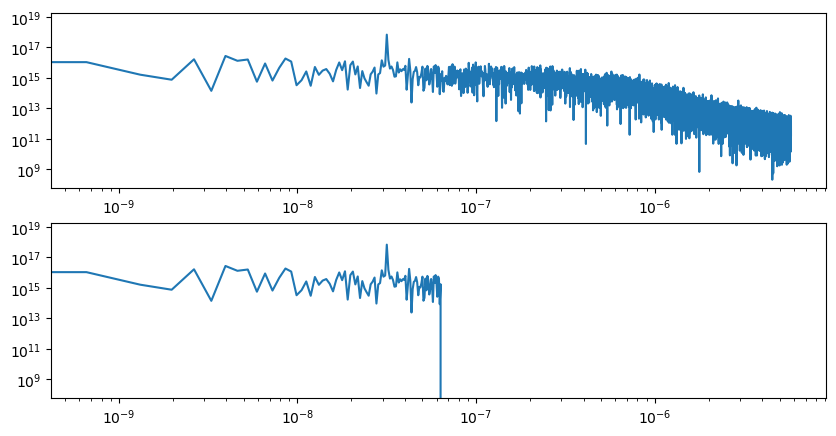

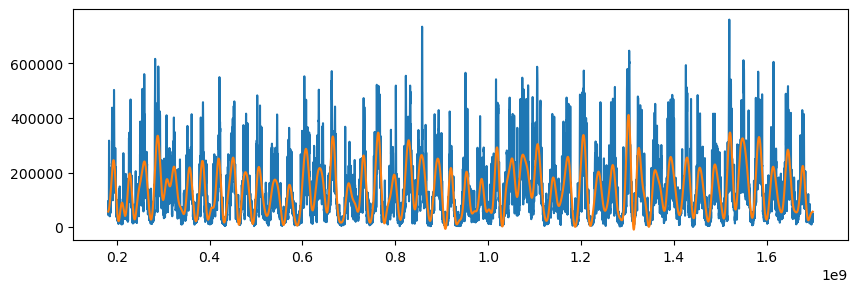

In [58]:
""" Filter the data using a naive cutoff filter. """

# get the fourier transform of the data
fft_signal = fft.rfft(discharge)

# get the frequencies
datetime_int = datetime.astype(int)  / 10**9

freqs, power = power_spectrum(discharge, datetime_int) # dt = 1s
# define the cutoff frequency

cut_off_period = 0.5 * 86400 * 365 # 0.5 year
cut_off_freq = 1/cut_off_period 

# find frequencies above the cutoff frequency

i_high_freq = freqs > cut_off_freq

# set those frequencies to zero

fft_signal = fft_signal.copy()
fft_signal[i_high_freq] = 0

power_filtered = power.copy()
power_filtered[i_high_freq] = 0

# inverse fourier transform

discharge_filtered = fft.irfft(fft_signal)

# plot the original and filtered specturm in 2 subplots

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.loglog(freqs, power)
ax1 = plt.subplot(211)

plt.subplot(2, 1, 2, sharex=ax1, sharey=ax1)
plt.loglog(freqs,power_filtered)

plt.show()

# plot the original and filtered data

plt.figure(figsize=(10, 3))
plt.plot(datetime_int,discharge)
plt.plot(datetime_int,discharge_filtered)
plt.show()



ValueError: x and y must have same first dimension, but have shapes (8787,) and (17572,)

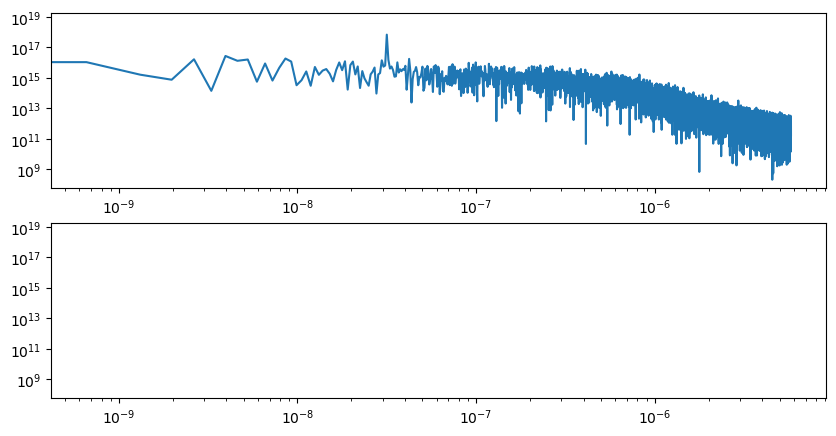

In [60]:
""" Filter the data using a Butterworth filter. """

from scipy.signal import butter, filtfilt

# define the butterworth filter
order = 5 # order of the filter

cut_off_period = 0.5 * 86400 * 365 # 0.5 year
cut_off_freq = 1/cut_off_period 

# get the Nyquist frequency
nyq = 1 / 2* (datetime_int[1] - datetime_int[0])

# get the cutoff frequency
cut_off_freq_norm = cut_off_freq / nyq

# get the butterworth filter coefficients
b, a = butter(order, cut_off_freq_norm, btype='low')

# apply the filter
discharge_filtered_butter = filtfilt(b, a, discharge)

# get the fft of the filtered signal
discharge_filtered_butter_fft = fft.rfft(discharge_filtered_butter)

# plot the original and filtered specturm in 2 subplots

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.loglog(freqs, power)
ax1 = plt.subplot(211)

plt.subplot(2, 1, 2, sharex=ax1, sharey=ax1)
plt.loglog(freqs,discharge_filtered_butter**2)

plt.show()


In [54]:
len(discharge_filtered_butter)

17572

In [ ]:
""" Calculate and plot the high-pass data """


